In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
"""
We receive a coin and we know nothing about its bias.
Assume that it has a uniform prior distribution.
We will start by flipping 500 times and create a probability distribution
"""

'\nWe receive a coin and we know nothing about its bias.\nAssume that it has a uniform prior distribution.\nWe will start by flipping 500 times and create a probability distribution\n'

In [31]:
# Creating a discrete prior belief.

prior_dist_index = np.linspace(0, 1, 101)
prior_dist_data = [1.0/101.0] * 101
prior_df = pd.DataFrame(index = prior_dist_index)

In [32]:
prior_df["prob_dist"] = prior_dist_data

In [33]:
prior_df.head()

,prob_dist
0.00,0.009901
0.01,0.009901
0.02,0.009901
0.03,0.009901
0.04,0.009901


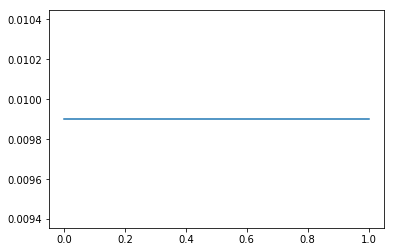

In [34]:
# Show our prior belief is uniform

plt.plot(prior_df)
plt.show()

In [35]:
prev_prob_head_list = prior_df.index * prior_df.prob_dist
prev_prob_head = sum(prev_prob_head_list)
print(prev_prob_head)

0.5000000000000003


In [36]:
# We will create a random bias to set the coin.
# This is the probability we get a HEAD.
random.seed(27092018)
true_bias = random.random()

In [38]:
# Simulating coin flips and updating our probability distribution using Bayes Rule
# Starting with 500 flips

for i in range(500):
    prev_prob_head_list = prior_df.index * prior_df.prob_dist
    prev_prob_head = sum(prev_prob_head_list)
    flip = random.random()
    if flip < true_bias:
        # This is a head
        # index represents the probability of flipping head aka bias
        # prob_dist represents likelihood of this bias given the data we have encountered
        prior_df["prob_dist"] = prior_df.index * prior_df.prob_dist / prev_prob_head
    else:
        # This is a tail
        prior_df["prob_dist"] = (1 - prior_df.index) * prior_df.prob_dist / prev_prob_head


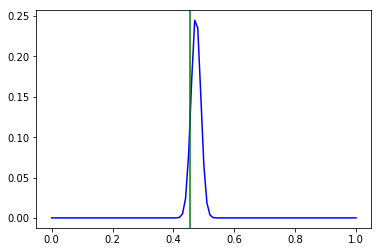

In [39]:
flip_500_df = prior_df.copy()

plt.plot(flip_500_df, "b")
plt.axvline(true_bias, color="g")
plt.show()

In [40]:
# Now with an extra 1500 flips
for i in range(1500):
    prev_prob_head_list = prior_df.index * prior_df.prob_dist
    prev_prob_head = sum(prev_prob_head_list)
    flip = random.random()
    if flip < true_bias:
        # This is a head
        prior_df["prob_dist"] = prior_df.index * prior_df.prob_dist / prev_prob_head
    else:
        # This is a tail
        prior_df["prob_dist"] = (1 - prior_df.index) * prior_df.prob_dist / prev_prob_head

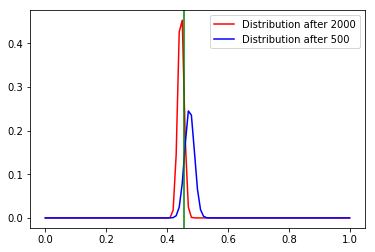

In [41]:
plt.plot(prior_df, "r")
plt.plot(flip_500_df, "b")
plt.axvline(true_bias, color = "g")
plt.legend(["Distribution after 2000", "Distribution after 500"])
plt.show()